# TASK - 1

### IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING DATA 

In [2]:
df = pd.read_csv("train.csv") 

### COLUMNS IN THE DATASET

In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

### PRE-PROCESSING

#### LOOKING FOR ANY NULL VALUES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.shape

(9800, 18)

#### LOOKING THROUGH THE DATA SAMPLE

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

#### FINDING THE SIMILARITIES BETWEEN THE NULL VALUES 

In [8]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


#### REPLACING THE NULL VALUES

In [9]:
df.loc[(df['State']=='Vermont') & (df['City']=='Burlington'),'Postal Code'] = 05401.0

### VISUALIZATION

#### 1. SHIPMENT MODE DETAILS

<Axes: xlabel='Ship Mode', ylabel='Count'>

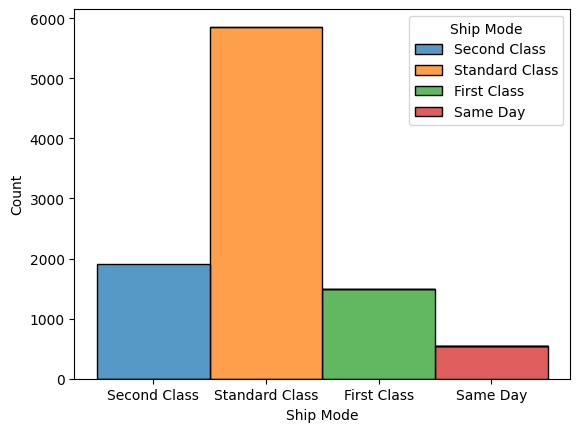

In [10]:

sns.histplot(data=df, x='Ship Mode', hue='Ship Mode', multiple='stack')

#### 2. REVENUE GENERATED BY EACH SEGMENT

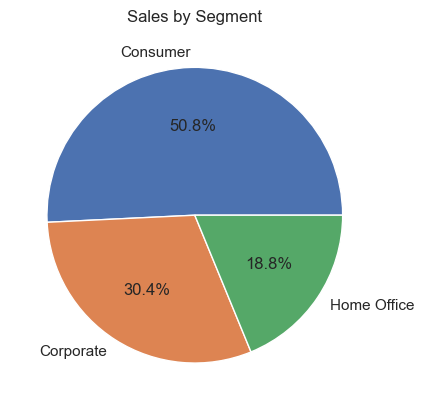

In [12]:
sales_by_segment = df.groupby('Segment')['Sales'].sum()
labels = list(sales_by_segment.index)
values = list(sales_by_segment.values)
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sales by Segment')
plt.show()

#### 3. REVENUE GENERATED BASED ON CATEGORY AND SUB-CATEGORY

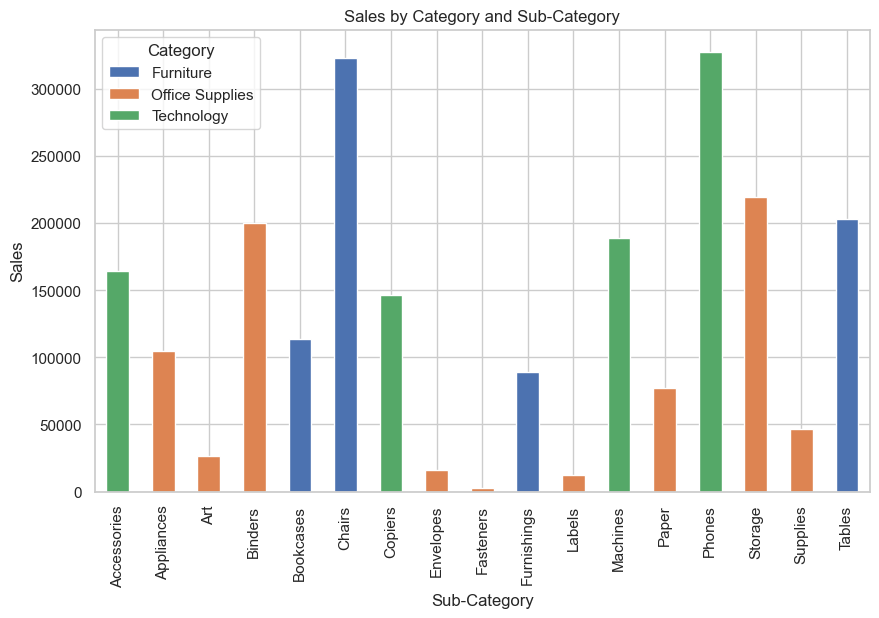

In [13]:
sales_by_category = df.groupby(["Category", "Sub-Category"])["Sales"].sum().reset_index()
sales_pivot = sales_by_category.pivot(index="Sub-Category", columns="Category", values="Sales")
sns.set_style("whitegrid")
ax = sales_pivot.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_title("Sales by Category and Sub-Category")
ax.set_xlabel("Sub-Category")
ax.set_ylabel("Sales")
plt.show()

#### 4. TYPES OF PRODUCT ORDERED BASED ON REGION

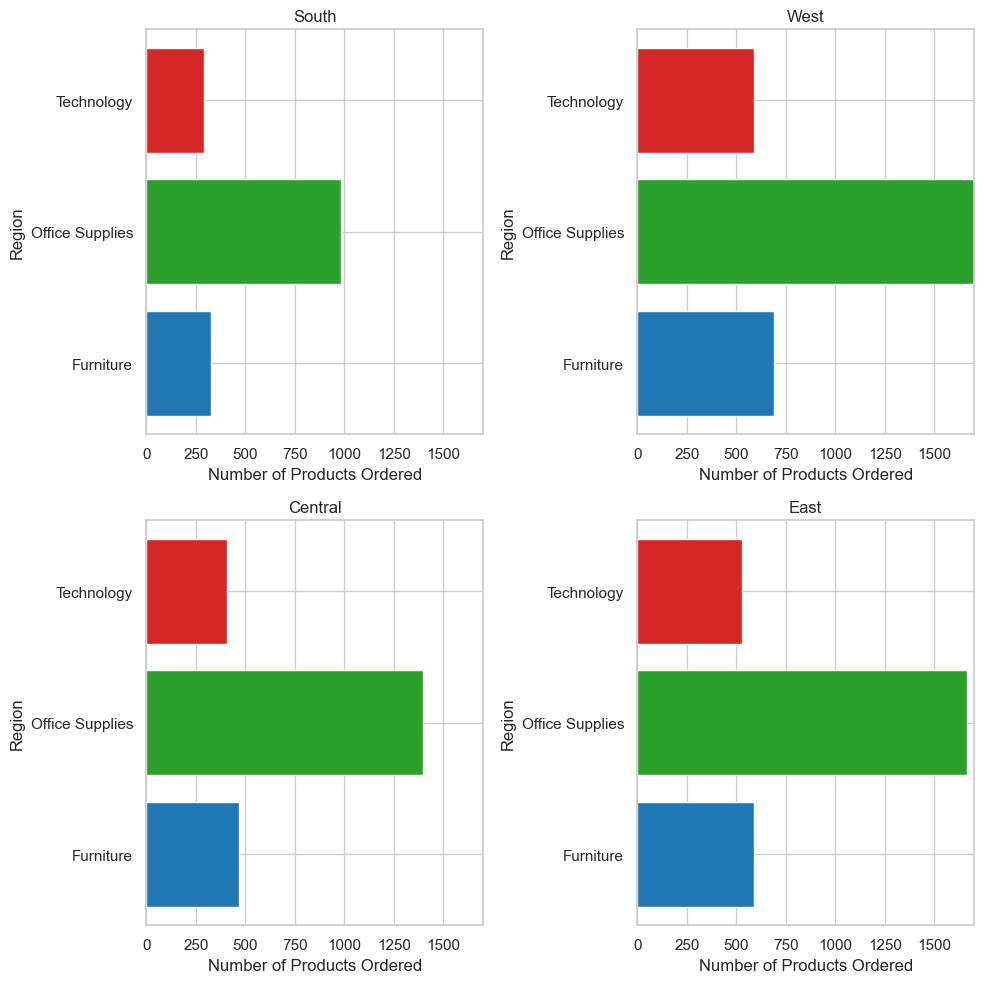

In [34]:
data = df['Region'].unique()
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
for i, region in enumerate(data):
    furniture_df = df[df["Region"] == region]
    furniture_by_category = furniture_df.groupby("Category")["Product ID"].count()
    colors = ["#1f77b4", "#2ca02c", "#d62728"]
    row_idx = i // ncols
    col_idx = i % ncols
    axes[row_idx, col_idx].barh(furniture_by_category.index, furniture_by_category.values, color=colors)
    axes[row_idx, col_idx].set_xlabel("Number of Products Ordered")
    axes[row_idx, col_idx].set_ylabel("Region")
    axes[row_idx, col_idx].set_title(region)
    axes[row_idx, col_idx].set_xlim([0, 1700])
plt.tight_layout()
plt.show()

#### 5. SALES BASED ON THE SEGMENT AND REGION

<Axes: xlabel='Segment', ylabel='Region'>

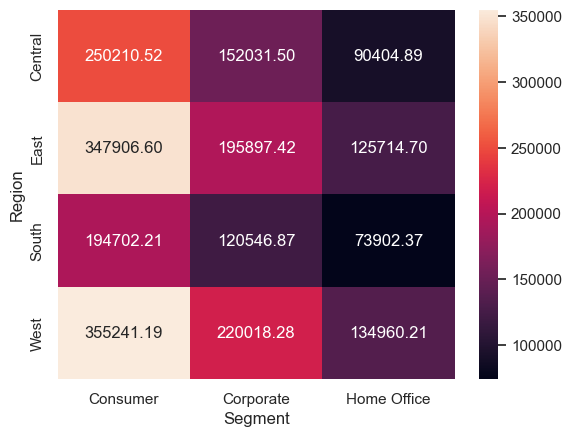

In [39]:
grouped_data = df.groupby(["Region", "Segment"])["Sales"].sum().reset_index()
pivot_data = grouped_data.pivot(index="Region", columns="Segment", values="Sales")
sns.heatmap(pivot_data, annot=True, fmt=".2f")

#### 6. SALES PERCENTAGE BY SUB-CATEGORY

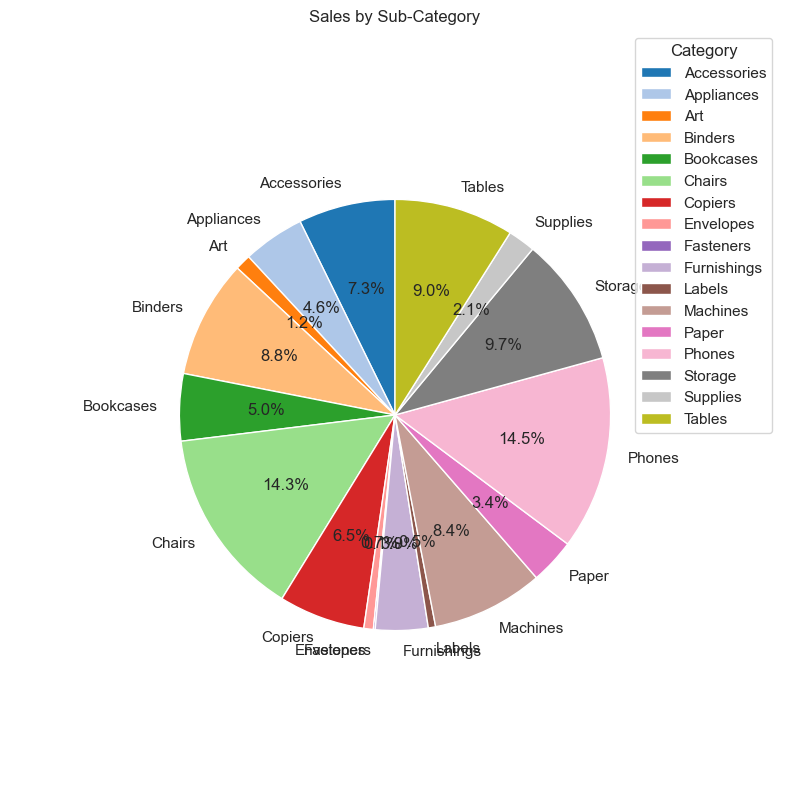

In [69]:
total_sales = sales_by_category.groupby("Sub-Category")["Sales"].sum()
fig, ax = plt.subplots(figsize=(10,10))
cmap = plt.get_cmap("tab20")
colors = cmap(np.arange(len(total_sales)) % cmap.N)
ax.pie(total_sales, labels=total_sales.index, colors=colors, autopct='%1.1f%%', startangle=90, radius=0.7)
ax.set_title("Sales by Sub-Category")
ax.legend(title="Category", loc="upper right")
plt.show()
